# Libraries

## Library Installation

Here you can install the necessary libraries for the correct functioning of the code.
This step must be done only once and it should be done directly on terminal.

In [19]:
'''
pip install pandas
pip install seaborn
pip install matplotlib
pip install tarfile
pip install haversine
'''

'\npip install pandas\npip install seaborn\npip install matplotlib\npip install tarfile\npip install haversine\n'

## Library Importation.

Some libraries must be installed and imported for the codes to work correctly.

In [20]:
from haversine import haversine, Unit                                       # Importing specific functions from the haversine library for distance calculation
import tarfile                                                              # Importing tarfile to be able to compress the results.
import pandas as pd                                                         # The library pandas will help with all the data analyses.
import seaborn as sns                                                       # This library contains colors for the plots.
import matplotlib.pyplot as plt                                             # matplotlib let us plot the results.

# Calculation of distances

### make_tarfile function.

This function is defined to compress a file in .tar.gz format

Requirements:<br>
&emsp;&emsp;output_filename&emsp;&emsp;&emsp;&emsp;String&emsp;&emsp;&emsp;&emsp;Name of the output file.<br>
&emsp;&emsp;source_file&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;File&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;File to be compressed.<br>
        
Output:<br>
&emsp;&emsp;output_filename&emsp;&emsp;&emsp;&emsp;.tar.gz-File&emsp;&emsp;File Compressed.

In [21]:
def make_tarfile(output_filename, source_file):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_file)

### Distances function

In this main function two different files are read. The first "cultural_hosts.csv" contains the information of all the airbnbs that you want to study, while the second "places.csv" contains the places of interest in the city that you want to study.

Requirements:<br>
&emsp;&emsp;cultural_hosts.csv&emsp;&emsp;&emsp;&emsp;csv-File&emsp;&emsp;&emsp;&emsp;File with all the information of the airbnbs to be studied.<br>
&emsp;&emsp;places.csv&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;csv-File&emsp;&emsp;&emsp;&emsp;File with all the name, latitude, and longitude for the landmarks.<br>
        
Output:<br>
&emsp;&emsp;hosts.csv&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;csv-File&emsp;&emsp;&emsp;&emsp;The original hosts.csv file with added columns containing the distances to all the landmarks.

In [22]:
def Distances(hosts = 'Information/hosts.csv', places = 'Information/places.csv', result = 'Results/hosts.csv'):
    # Attempt to load the data from CSV files
    try:
        # Reading the hotels file, with latitude and longitude columns, using 'ISO-8859-1' encoding to ensure compatibility with a variety of CSV file encodings.
        hosts_df = pd.read_csv(hosts, encoding='ISO-8859-1')
        # Reading the landmarks file with the same encoding
        places_df = pd.read_csv(places, encoding='ISO-8859-1')
    except UnicodeDecodeError as e:
        # Handling a potential exception that occurs if there is an encoding conflict.
        print(f"An error occurred when reading the CSV files: {e}")
        print("Please ensure your files are correctly encoded.")
        return  # Exiting the function early due to the error.

    # Adding new columns to the hotels DataFrame, one for each place, initializing with None.
    for i, place in places_df.iterrows():
        # The column name is composed of a base string and the unique place name.
        hosts_df[f'd_t_{place["place_name"]}'] = None

    # Iterating over each airbnb in the DataFrame to calculate distances.
    for i, host in hosts_df.iterrows():
        # Retrieving the coordinates of the current airbnb.
        host_coord = (host['latitude'], host['longitude'])

        # Nested loop to iterate over each landmark for distance calculation.
        for j, place in places_df.iterrows():
            # Retrieving the coordinates of the current landmark.
            place_coord = (place['latitude'], place['longitude'])
            # Calculating the geographical distance using the haversine formula.
            distance = haversine(host_coord, place_coord, unit=Unit.KILOMETERS)

            # Storing the calculated distance in the appropriate column of the airbnb's DataFrame.
            hosts_df.at[i, f'd_t_{place["place_name"]}'] = distance

    # Clean the information to keep only the information of interest.
    columns_of_interest = ["id", "host_id", "host_url", "host_name", "host_is_superhost", "host_listings_count",
                            "host_total_listings_count", "d_t_museo_nacional_de_antropologia", "d_t_castillo_de_chapultepec",
                            "d_t_palacio_de_bellas_artes", "d_t_basilica_de_la_virgen_de_guadalupe", "d_t_museo_frida_kahlo",
                            "d_t_museo_soumaya", "d_t_museo_del_templo_mayor", "d_t_zocalo_(plaza_de_la_constitucion)",
                            "d_t_catedral_metropolitana", "d_t_palacio_nacional", "d_t_palacio_postal", "d_t_museo_de_arte_popular",
                            "d_t_mercado_de_artesanias_de_la_ciudadela", "d_t_museo_memoria_y_tolerancia", "d_t_arena_mexico",
                            "d_t_monumento_a_la_revolucion", "d_t_museo_diego_rivera", "d_t_museo_nacional_de_arte",
                            "d_t_museo_casa_leon_trotsky", "d_t_cineteca_nacional", "d_t_museo_franz_mayer",
                            "d_t_antiguo_colegio_de_san_ildefonso", "d_t_museo_del_tiempo_tlalpan", "d_t_monumento_a_la_independencia_(el_angel)",
                            "d_t_sagrario_metropolitano", "d_t_museo_de_arte_moderno", "d_t_museo_universitario_arte_contemporaneo_(muac)",
                            "d_t_plaza_de_las_tres_culturas", "d_t_monumento_a_los_ninos_heroes", "d_t_zona_arqueologica_tlatelolco",
                            "d_t_museo_jumex", "d_t_museo_tamayo", "d_t_parroquia_san_juan_bautista", "d_t_museo_nacional_de_san_carlos",
                            "d_t_palacio_de_mineria", "d_t_mercado_medellin"]
    
    filtered_data = hosts_df[columns_of_interest]
    filtered_data = filtered_data.copy()
    filtered_data.loc[:, 'host_is_superhost'] = filtered_data['host_is_superhost'].map({'f': 0, 't': 1})
    filtered_data = filtered_data.dropna()

    # Saving the updated DataFrame with the new distance information to a new CSV file.
    filtered_data.to_csv(result, index=False)

    # Console message indicating successful completion of the script.
    print('The distances have been calculated and saved to', result)
    make_tarfile(result+'.tar.gz',result)
    print('The file was compressed and saved to', result+'.tar.gz')

## Variable initialization and run.

Here, the variables are initialized with the necessary files and the main function "Distances" is called.

In [23]:
hosts           = 'Information/hosts.csv'
cultural_places = 'Information/cultural_places.csv'
cultural_result = 'Results/hosts_with_distances_cultural.csv'

Distances(hosts, cultural_places, cultural_result)

The distances have been calculated and saved to Results/hosts_with_distances_cultural.csv
The file was compressed and saved to Results/hosts_with_distances_cultural.csv.tar.gz


# Correlation searching for Airbnb data

## Data importation

In [24]:
data = pd.read_csv('Results/hosts_with_distances_cultural.csv')

## Pearson's correlations

### Pearson correlation computation for host_is_superhost

Here the correlation between 'host_is_superhost' and the distances to the different places is computed.

#### Selection of the data of interest

In [25]:
data_of_interest_1 = ['host_is_superhost'] + list(data.columns[-36:])
data_interest_1 = data[data_of_interest_1]

#### Correlation computation

In [26]:
correlations_1 = data_interest_1.corr(method='pearson')

#### Create the correlation Matrix

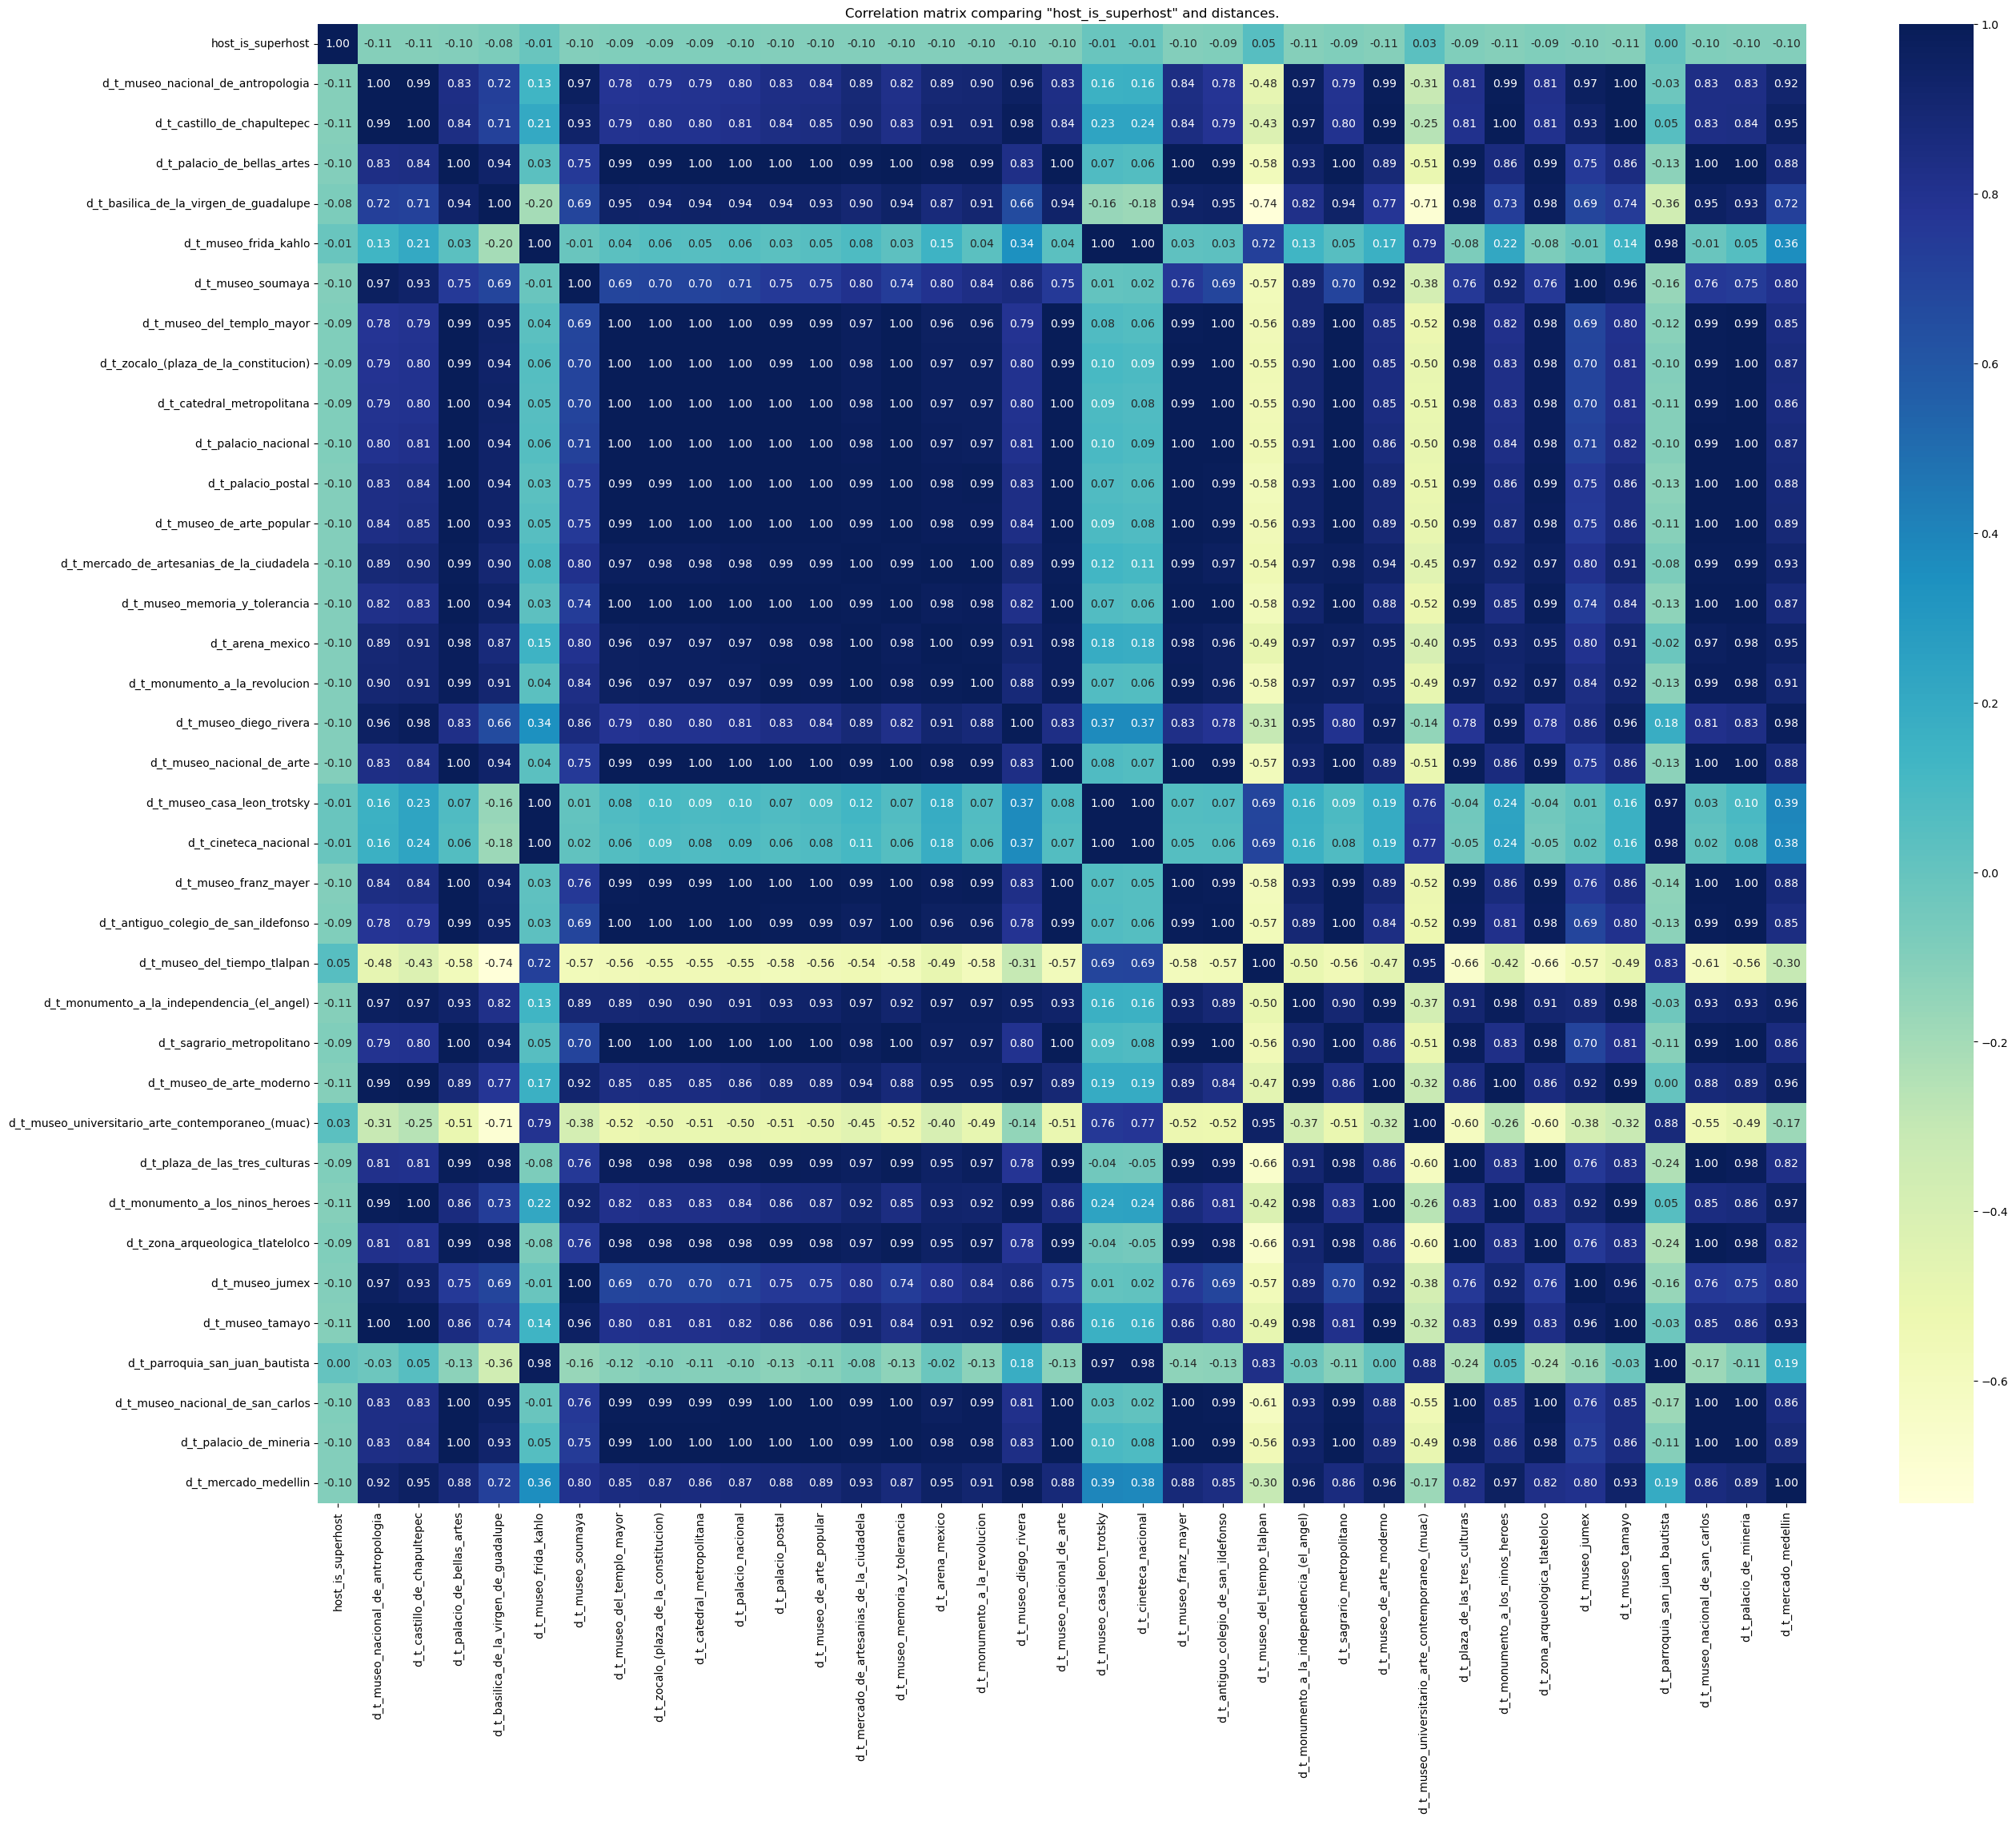

In [27]:
fig = plt.figure(figsize=(30, 24))
sns.heatmap(correlations_1, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
plt.title('Correlation matrix comparing "host_is_superhost" and distances.')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
fig.savefig('Results/Correlation_Matrix_1.pdf')
fig.savefig('Results/Correlation_Matrix_1.png')

#### Show the correlations

In [28]:
correlations_1 = correlations_1.drop('host_is_superhost')
correlations_1['host_is_superhost']

d_t_museo_nacional_de_antropologia                  -0.106717
d_t_castillo_de_chapultepec                         -0.106658
d_t_palacio_de_bellas_artes                         -0.097822
d_t_basilica_de_la_virgen_de_guadalupe              -0.082847
d_t_museo_frida_kahlo                               -0.011714
d_t_museo_soumaya                                   -0.100423
d_t_museo_del_templo_mayor                          -0.093401
d_t_zocalo_(plaza_de_la_constitucion)               -0.094589
d_t_catedral_metropolitana                          -0.094570
d_t_palacio_nacional                                -0.095627
d_t_palacio_postal                                  -0.097916
d_t_museo_de_arte_popular                           -0.098194
d_t_mercado_de_artesanias_de_la_ciudadela           -0.101529
d_t_museo_memoria_y_tolerancia                      -0.096840
d_t_arena_mexico                                    -0.101699
d_t_monumento_a_la_revolucion                       -0.102179
d_t_muse

### Pearson correlation computation for host_total_listings_count

Here the correlation between 'host_total_listings_count' and the distances to the different places is computed.

#### Selection of the data of interest

In [29]:
data_of_interest_2 = ['host_total_listings_count'] + list(data.columns[-36:])
data_interest_2 = data[data_of_interest_2]

#### Correlation computation

In [30]:
correlations_2 = data_interest_2.corr(method='pearson')

#### Create the correlation Matrix

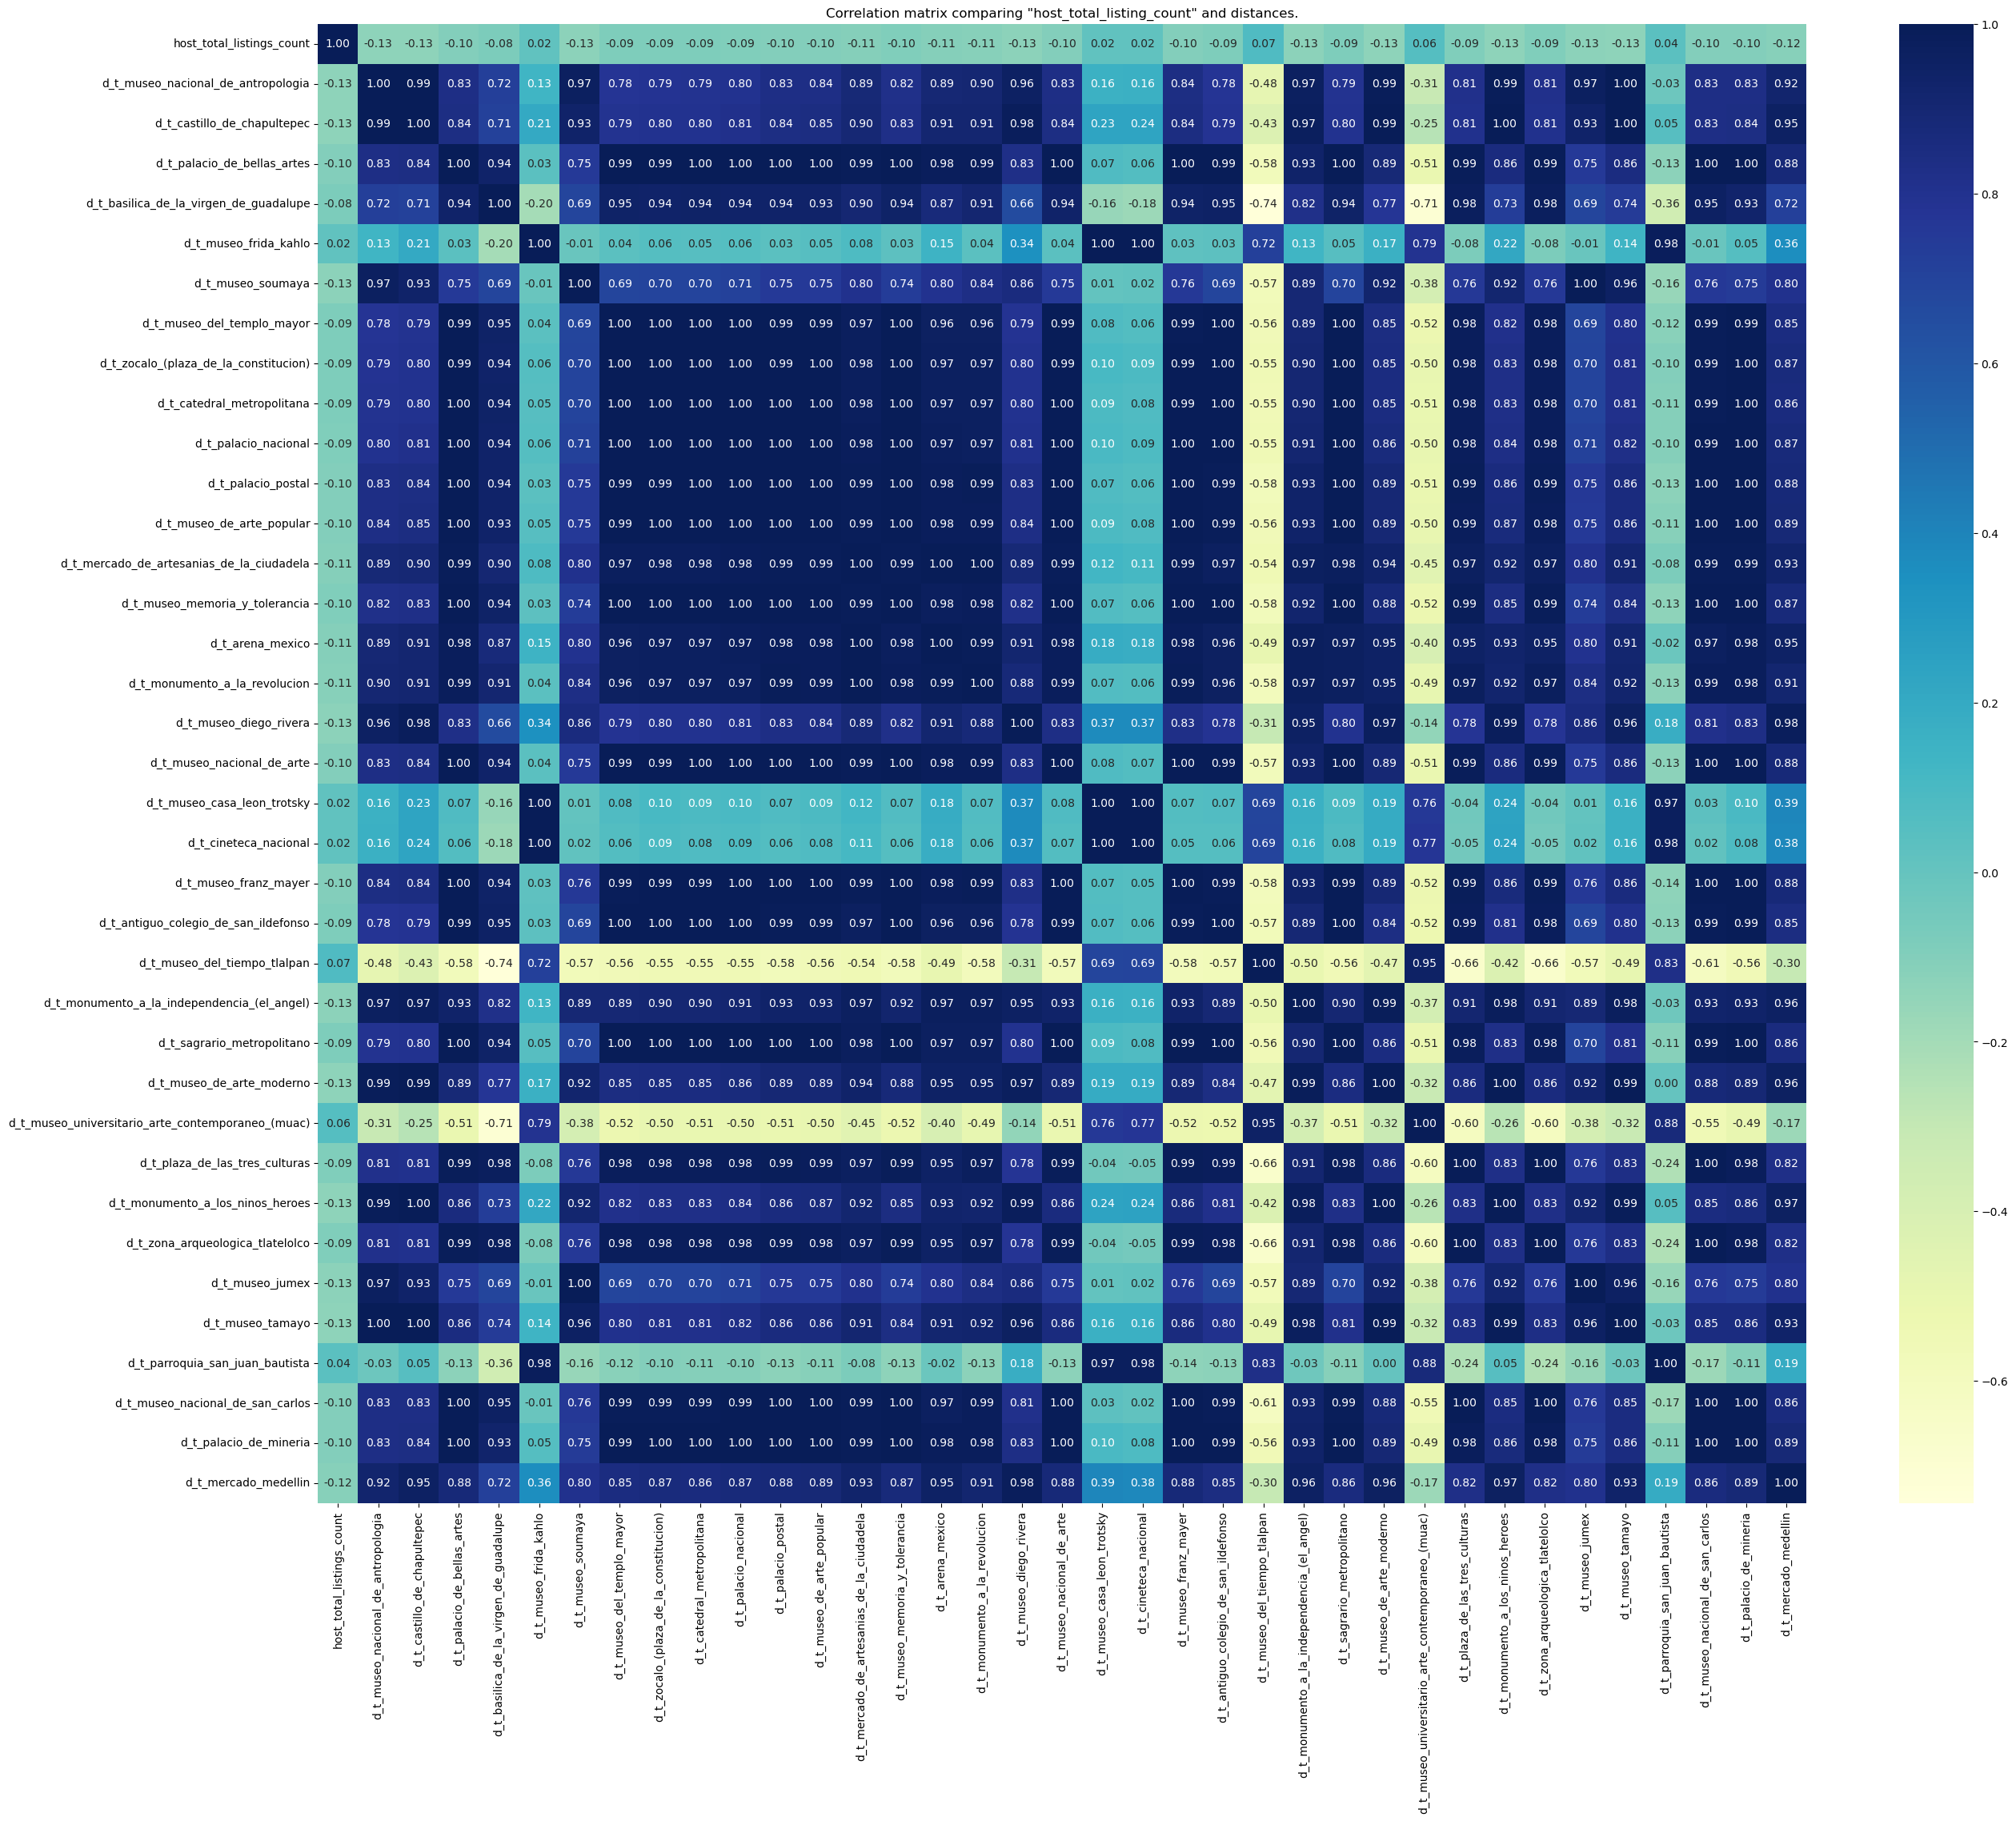

In [31]:
fig = plt.figure(figsize=(30, 24))
sns.heatmap(correlations_2, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
plt.title('Correlation matrix comparing "host_total_listing_count" and distances.')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
fig.savefig('Results/Correlation_Matrix_2.pdf')
fig.savefig('Results/Correlation_Matrix_2.png')

#### Show the correlations

In [32]:
correlations_2 = correlations_2.drop('host_total_listings_count')
correlations_2['host_total_listings_count']

d_t_museo_nacional_de_antropologia                  -0.134035
d_t_castillo_de_chapultepec                         -0.133716
d_t_palacio_de_bellas_artes                         -0.097745
d_t_basilica_de_la_virgen_de_guadalupe              -0.081412
d_t_museo_frida_kahlo                                0.018315
d_t_museo_soumaya                                   -0.127201
d_t_museo_del_templo_mayor                          -0.087836
d_t_zocalo_(plaza_de_la_constitucion)               -0.088913
d_t_catedral_metropolitana                          -0.089305
d_t_palacio_nacional                                -0.091068
d_t_palacio_postal                                  -0.098056
d_t_museo_de_arte_popular                           -0.097797
d_t_mercado_de_artesanias_de_la_ciudadela           -0.107906
d_t_museo_memoria_y_tolerancia                      -0.095391
d_t_arena_mexico                                    -0.109484
d_t_monumento_a_la_revolucion                       -0.111675
d_t_muse

### Pearson correlation computation for host_id

Here the correlation between 'host_id' and the distances to the different places is computed.

#### Selection of the data of interest

In [33]:
host_id_counts = data['host_id'].value_counts().to_frame(name='host_listing_count')
data_with_counts = data.join(host_id_counts, on='host_id')
data_of_interest_3 = ['host_listing_count'] + list(data.columns[-36:])
data_interest_3 = data_with_counts[data_of_interest_3]

#### Correlation computation

In [34]:
correlations_3 = data_interest_3.corr(method='pearson')

#### Create the correlation Matrix

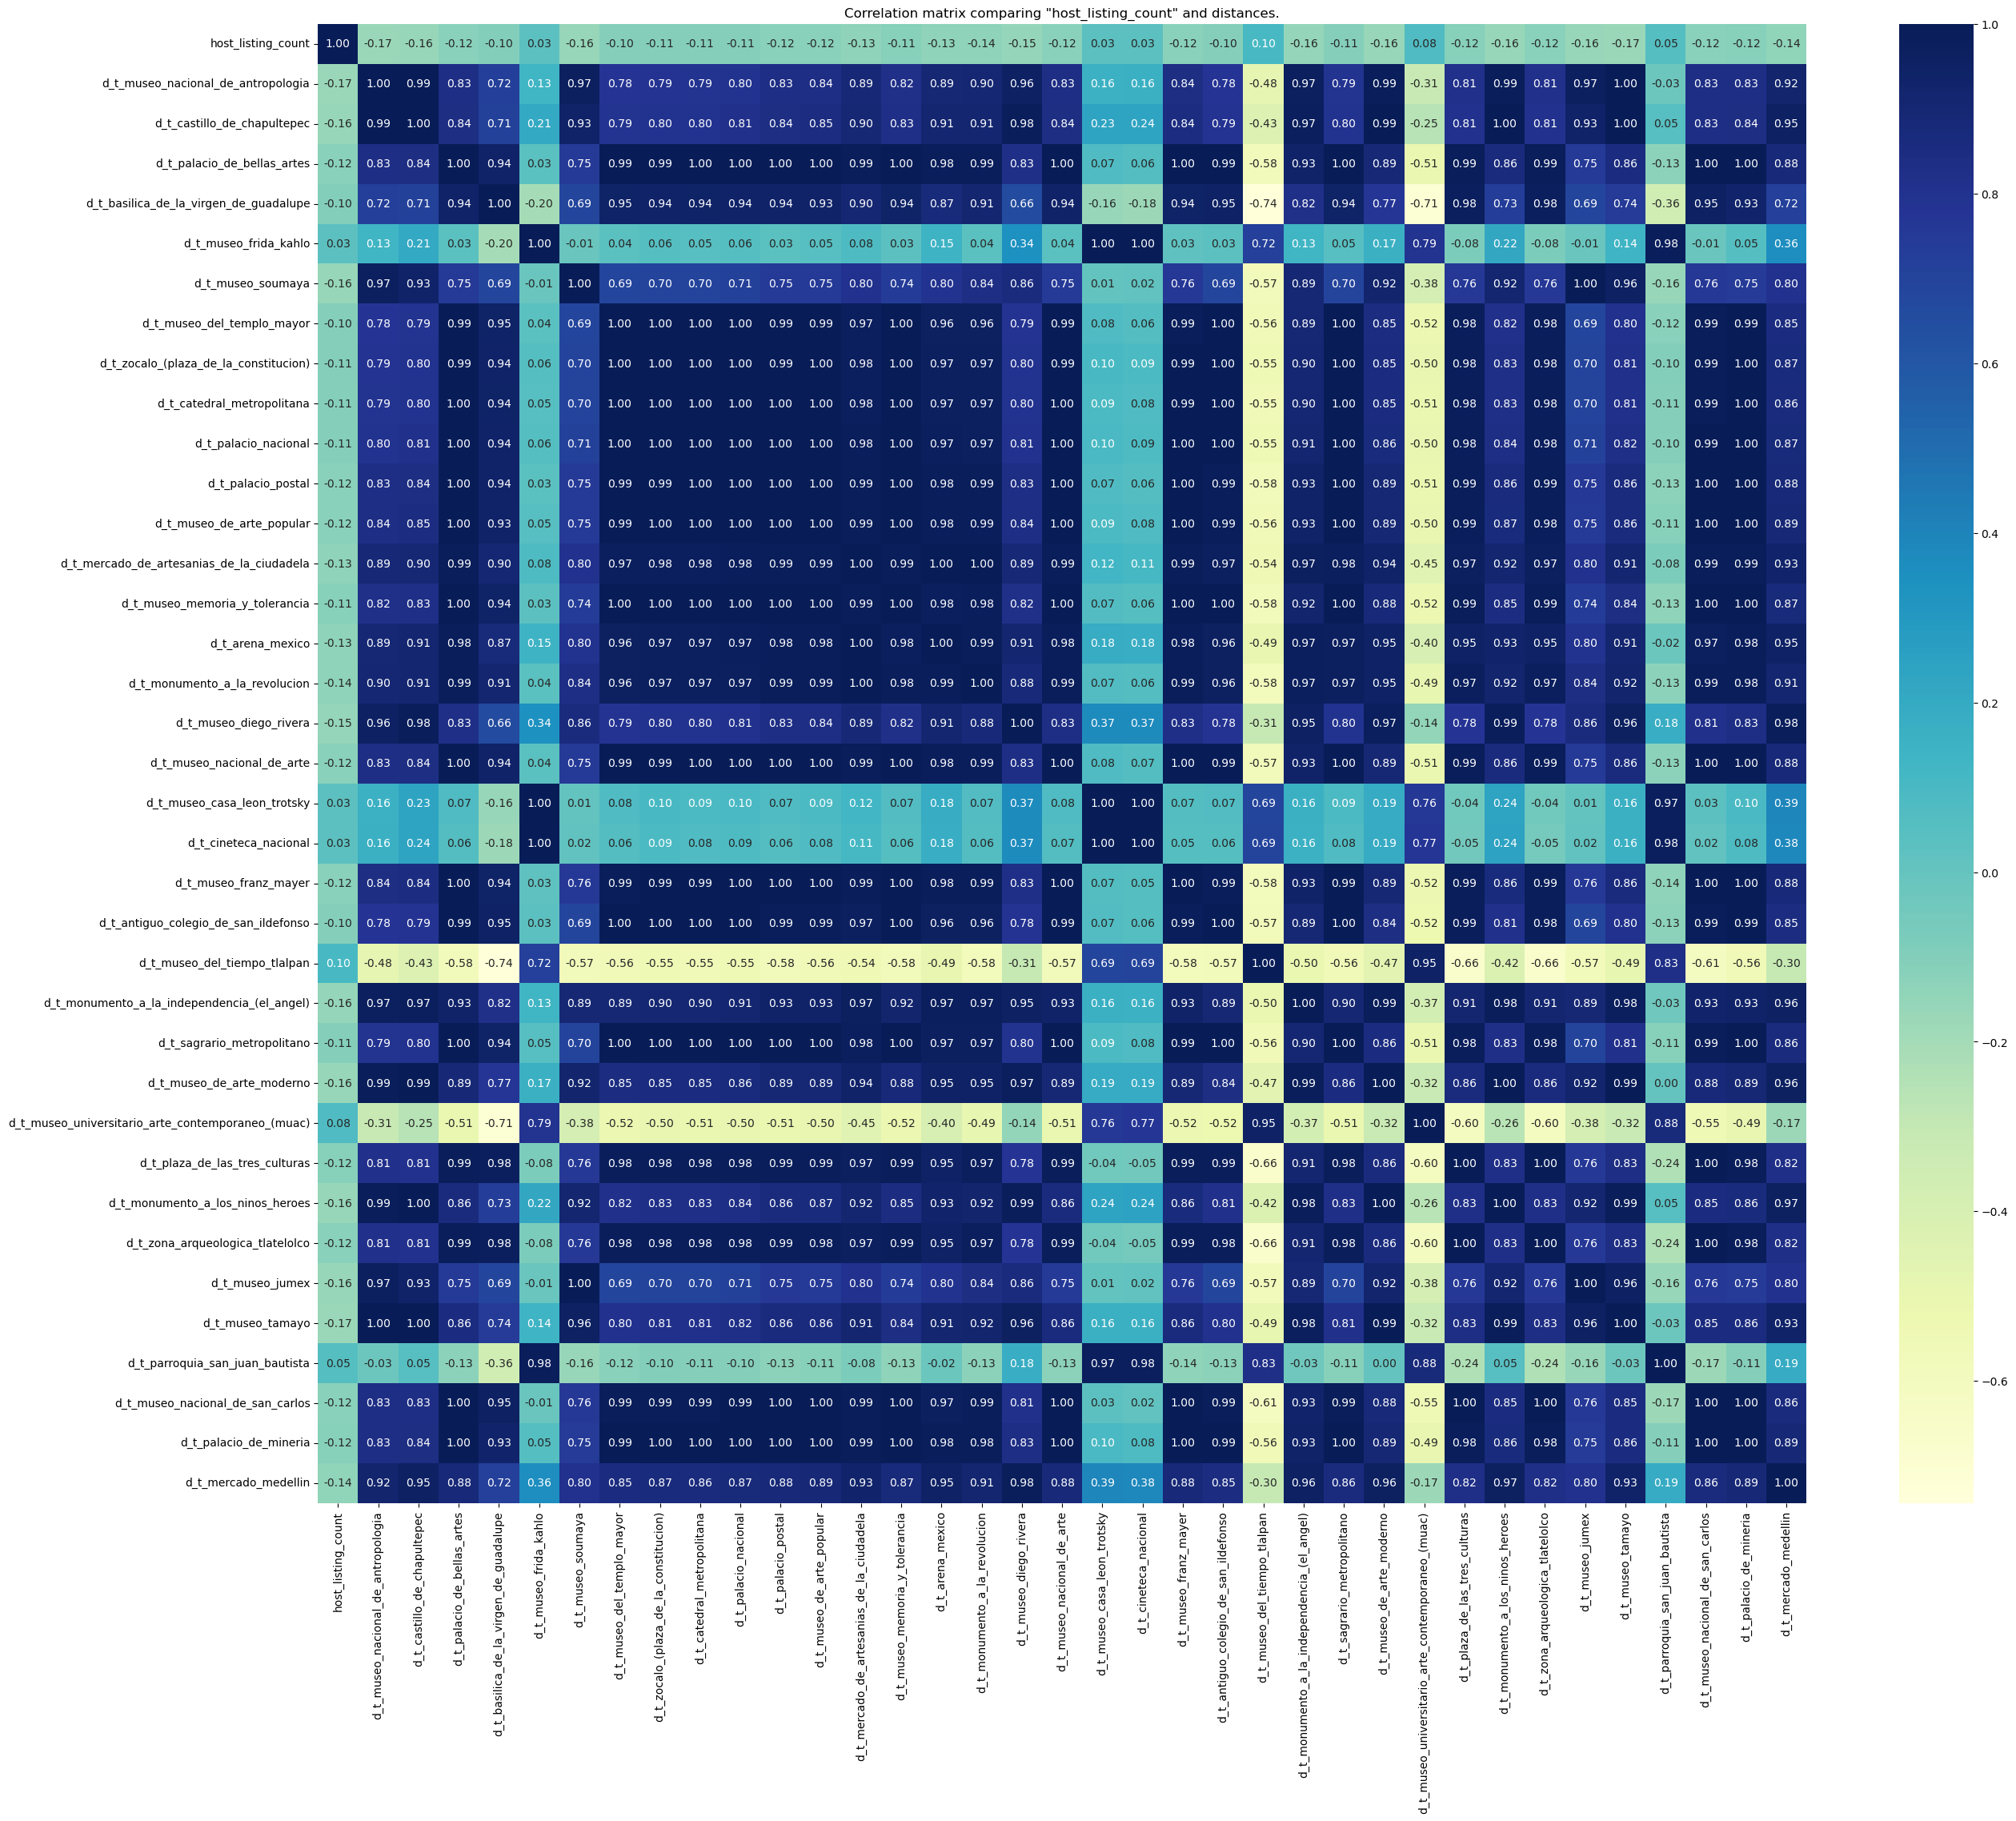

In [35]:
fig = plt.figure(figsize=(30, 24))
sns.heatmap(correlations_3, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
plt.title('Correlation matrix comparing "host_listing_count" and distances.')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
fig.savefig('Results/Correlation_Matrix_3.pdf')
fig.savefig('Results/Correlation_Matrix_3.png')

#### Show the correlations

In [36]:
correlations_3 = correlations_3.drop('host_listing_count')
correlations_3['host_listing_count']

d_t_museo_nacional_de_antropologia                  -0.166486
d_t_castillo_de_chapultepec                         -0.164612
d_t_palacio_de_bellas_artes                         -0.117643
d_t_basilica_de_la_virgen_de_guadalupe              -0.102757
d_t_museo_frida_kahlo                                0.031590
d_t_museo_soumaya                                   -0.162016
d_t_museo_del_templo_mayor                          -0.104064
d_t_zocalo_(plaza_de_la_constitucion)               -0.105422
d_t_catedral_metropolitana                          -0.105974
d_t_palacio_nacional                                -0.108343
d_t_palacio_postal                                  -0.118095
d_t_museo_de_arte_popular                           -0.117635
d_t_mercado_de_artesanias_de_la_ciudadela           -0.131365
d_t_museo_memoria_y_tolerancia                      -0.114347
d_t_arena_mexico                                    -0.132739
d_t_monumento_a_la_revolucion                       -0.137219
d_t_muse